#Preparación de datos - Data Preparation

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es aprender a aplicar diferentes técnicas para obtener la vista minable que será utilizada como entrada a un algoritmo de analítica utilizando el lenguaje de programación Python en Databricks.  </p>

##Vista Minable

##Cargar y limpiar los datos

Carque el mismo conjunto de datos, Automobile, que se utilizó en el cuaderno anterior, utilizando la librería Pandas:

In [0]:
# Importar libreria requerida
import pandas as pd
# Read data from CSV file
csv_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(csv_path,sep=",",header= None)
# crear la lista headers 
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
# Imprimer las primeras cinco filas de un dataframe para probar que todo ok
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Realice algunos procesos de limpieza necesarios para continuar con el proceso:

In [0]:
import numpy as np

# reemplazar "?" por NaN
df.replace("?", np.nan, inplace = True)
#Calcular el promedio de la columna
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
#Remplazar "NaN por el valor de la media en la columna "normalized-losses"
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
#Reemplazamos los valores faltantes en 'num-of-doors' con el valor más frecuente o la moda
df["num-of-doors"].replace(np.nan, "four", inplace=True)
#Remplaza "NaN" por el valor de la media
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
#Convertir el tipo de datos al formato apropiado
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df["horsepower"]=df["horsepower"].astype(int, copy=True)

##Normalización

<p>La normalización es el proceso de transformar los valores de algunas variables dentro de un rango similar.</p>
<p>Para hacer una demostración, se normaliza la variable <b>length</b> con normalización MIN-MAX y la variable <b>width</b> con normalización Z-SCORE</p>

In [0]:
#Normalización MN-MAX. Sustituimos el valor directamente en la columna "length"
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#df[['length','width']] = scaler.fit_transform(df[['length','width']])
df[['length']] = scaler.fit_transform(df[['length']])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [0]:
#Normalización Z-SCORE. Sustituimos el valor directamente en la columna "width"
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['width']] = scaler.fit_transform(df[['width']])
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
De acuerdo al ejemplo anterior, normalize la columna "height" con cualquiera de los dos métodos:
</p>
</div>

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Se muestran las tres columnas normalizadas:

In [0]:
#Se muestran las tres columnas normalizadas
df[["length","width","height"]].head(10)

,length,width,height
0,0.413433,-0.844782,48.8
1,0.413433,-0.844782,48.8
2,0.449254,-0.190566,52.4
3,0.529851,0.136542,54.3
4,0.529851,0.230001,54.3
5,0.540299,0.183272,53.1
6,0.770149,2.566488,55.7
7,0.770149,2.566488,55.7
8,0.770149,2.566488,55.9
9,0.553731,0.930947,52.0


##Discretización

<p>En el conjunto de datos, <b>horsepower</b> es una variable con valor en el rango de 48 a 288, tiene 57 valores únicos.¿Qué pasaría si se se observan las diferencias de precio entre automoviles con altos, medios y bajos caballos de fuerza (3 tipos)? ¿Se pueden reacomodar dentro de tres 'grupos' para facilitar el análisis? </p>

<p>Se utiliza el método de Pandas <code>cut</code> para discretizar la columna <b>horsepower</b> en 3 grupos.</p>
<p>Se quiere utilizar Discretización por intervalos de igual rango</p>
<p>Observe la variable antes de discretizar</p>

In [0]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,0.491780,1.089643e-15,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,0.184139,1.002448e+00,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.519219,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,0.000000,-2.620512e+00,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,0.376119,-8.447824e-01,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,0.479104,-1.905661e-01,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,0.626866,4.636501e-01,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,1.000000,2.987056e+00,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,49.000000,54.000000,45400.000000


Grafique el histograma de los caballos de fuerza para ver la apariencia de su distribución antes de discretizar:

Out[8]: Text(0.5, 1.0, 'horsepower bins')

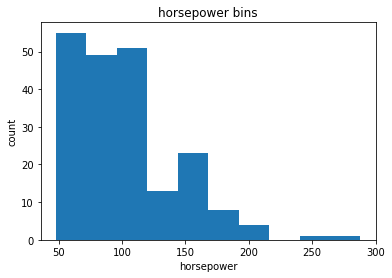

In [0]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# establece las etiquetas x/y y muestra el título 
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Paso 1: Crear los intervalos, para este ejemplo serían 3 intervalos de igual rango. Para ello se utiliza la función <code>np.linspace</code>, que divide un rango de valores, en n intervalos equidistantes.

In [0]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

Out[9]: array([ 48., 128., 208., 288.])

Paso 2: Ahora se van a establecer los nombres de los grupos:

In [0]:
group_names = ['Bajo', 'Medio', 'Alto']

Paso 3: Se aplica la función <code>cut</code> para determinar a quien pertenece cada valor de <code>df['horsepower']</code>.

In [0]:
#Le paso a la función la columna donde quiero discretizar, los bins que deseo hacer, los nombres de los grupos y que SI deseo incluir el número más bajo.
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Bajo
1,111,Bajo
2,154,Medio
3,102,Bajo
4,115,Bajo
5,110,Bajo
6,110,Bajo
7,110,Bajo
8,140,Medio
9,160,Medio


Grafique el histograma de los caballos de fuerza para ver la apariencia de su distribución despúes de discretizar:

Out[12]: Text(0.5, 1.0, 'horsepower bins')

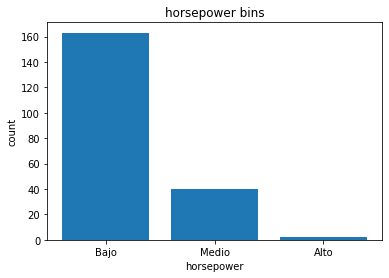

In [0]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# establece las etiquetas x/y y muestra el título 
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Ejemplo para crear segmentos o grupos personalizados por el analista:

In [0]:
# EJEMPLO NO EJECUTAR
#df['Age-binned']=pd.cut(x = df['Age'],
                        #bins = [0,18,30,50,120], 
                        #labels = ["Joven", "Adulto Joven", "Adulto","Adulto Mayor"])
#df[['Age','Age-binned']].head(10)

##Numerización

<p>Numerizar una columna que tiene solo dos valores posibles, usando 0 y 1. Se utiliza la variable <b>aspiration</b> donde "std" será 0, mientras "turbo" será 1.</p>
<p>Observe la columna <b>aspiration</b> antes de ser numerizada</p>

In [0]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Bajo
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0,Bajo
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0,Bajo
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0,Bajo
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0,Medio
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN,Medio


<p>Ahora se aplica la numerización, donde se generan dos colmumnas, pero solo se conversa la primera de las dos, siendo esta suficiente</p>

In [0]:
#la función get_dummies nos genera una columna para cada categoría de la variable con 0 y 1 si el valor está o no está.
#El parámetro drop_first nos deja una sola columna
df = pd.get_dummies(df, columns = ["aspiration"], drop_first = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,aspiration_turbo
0,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.413433,...,3.47,2.68,9.0,111,5000,21,27,13495.0,Bajo,0
1,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.413433,...,3.47,2.68,9.0,111,5000,21,27,16500.0,Bajo,0
2,1,122,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.449254,...,2.68,3.47,9.0,154,5000,19,26,16500.0,Medio,0
3,2,164,audi,gas,four,sedan,fwd,front,99.8,0.529851,...,3.19,3.40,10.0,102,5500,24,30,13950.0,Bajo,0
4,2,164,audi,gas,four,sedan,4wd,front,99.4,0.529851,...,3.19,3.40,8.0,115,5500,18,22,17450.0,Bajo,0
5,2,122,audi,gas,two,sedan,fwd,front,99.8,0.540299,...,3.19,3.40,8.5,110,5500,19,25,15250.0,Bajo,0
6,1,158,audi,gas,four,sedan,fwd,front,105.8,0.770149,...,3.19,3.40,8.5,110,5500,19,25,17710.0,Bajo,0
7,1,122,audi,gas,four,wagon,fwd,front,105.8,0.770149,...,3.19,3.40,8.5,110,5500,19,25,18920.0,Bajo,0
8,1,158,audi,gas,four,sedan,fwd,front,105.8,0.770149,...,3.13,3.40,8.3,140,5500,17,20,23875.0,Medio,1
9,0,122,audi,gas,two,hatchback,4wd,front,99.5,0.553731,...,3.13,3.40,7.0,160,5500,16,22,NaN,Medio,1


Cuente los valores en la nueva columna:

In [0]:
df["aspiration_turbo"].value_counts()

Out[16]: 0    168
1     37
Name: aspiration_turbo, dtype: int64

Numerizar una columna categórica y ordinal, que tiene varias categorías. Se utiliza la variable <b>num-of-cylinders</b> que es nominal y ordinal. Se muestran los valores actuales de la variable y sus cantidades:

In [0]:
df["num-of-cylinders"].value_counts()

Out[17]: four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

Se numeriza con la función <code>replace</code> asignando el valor deseado a cada categoría:

In [0]:
df["num-of-cylinders"].replace({"two":"2","three":"3","four":"4","five":"5","six":"6","eight":"8","twelve":"12"}, inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,aspiration_turbo
0,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.413433,...,3.47,2.68,9.0,111,5000,21,27,13495.0,Bajo,0
1,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.413433,...,3.47,2.68,9.0,111,5000,21,27,16500.0,Bajo,0
2,1,122,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.449254,...,2.68,3.47,9.0,154,5000,19,26,16500.0,Medio,0
3,2,164,audi,gas,four,sedan,fwd,front,99.8,0.529851,...,3.19,3.40,10.0,102,5500,24,30,13950.0,Bajo,0
4,2,164,audi,gas,four,sedan,4wd,front,99.4,0.529851,...,3.19,3.40,8.0,115,5500,18,22,17450.0,Bajo,0
5,2,122,audi,gas,two,sedan,fwd,front,99.8,0.540299,...,3.19,3.40,8.5,110,5500,19,25,15250.0,Bajo,0
6,1,158,audi,gas,four,sedan,fwd,front,105.8,0.770149,...,3.19,3.40,8.5,110,5500,19,25,17710.0,Bajo,0
7,1,122,audi,gas,four,wagon,fwd,front,105.8,0.770149,...,3.19,3.40,8.5,110,5500,19,25,18920.0,Bajo,0
8,1,158,audi,gas,four,sedan,fwd,front,105.8,0.770149,...,3.13,3.40,8.3,140,5500,17,20,23875.0,Medio,1
9,0,122,audi,gas,two,hatchback,4wd,front,99.5,0.553731,...,3.13,3.40,7.0,160,5500,16,22,NaN,Medio,1


Se puede revisar los nuevos valores de la columna y sus cantidades con la función <code>value_counts()</code> y revise el tipo de datos de la nueva columna con la función <code>dtypes</code>:

In [0]:
#Revisemos nuevamente los valores y sus cantidades para validar que se reemplazaron correctamente:
df["num-of-cylinders"].value_counts()

Out[19]: 4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

In [0]:
#Si miramos el tipo de dato de la columna sigue siendo un Object no olvidar cambiar su tipo de datos
df[['num-of-cylinders']].dtypes

Out[20]: num-of-cylinders    object
dtype: object

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
   <strong>AHORA TÚ: </strong>  
  <p>
    Numerize la columna <b>body-style</b> que es categórica y nominal generando columnas para cada uno de los valores:
</p>
</div>

In [0]:
df["body-style"].value_counts()

Out[21]: sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [0]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haz doble clic <b>aquí</b> para ver la solución.

<!-- Respuesta::

df = pd.get_dummies(df, columns = ["body-style"])
df.tail(10)

-->

##Agregar variables derivadas

Calculando una nueva variable a partir de combinar otras variables ya existentes. Calculo una variable de tipo 1, el Volumen del Auto, multiplicando las variables <b>length, width y height</b> este calculo debería hacerlo antes de normalizar las variables:

In [0]:
df['volume'] = df['length']*df['width']*df['height']
df.head()

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,aspiration_turbo,volume
0,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.413433,...,2.68,9.0,111,5000,21,27,13495.0,Bajo,0,-17.043925
1,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.413433,...,2.68,9.0,111,5000,21,27,16500.0,Bajo,0,-17.043925
2,1,122,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.449254,...,3.47,9.0,154,5000,19,26,16500.0,Medio,0,-4.486097
3,2,164,audi,gas,four,sedan,fwd,front,99.8,0.529851,...,3.40,10.0,102,5500,24,30,13950.0,Bajo,0,3.928435
4,2,164,audi,gas,four,sedan,4wd,front,99.4,0.529851,...,3.40,8.0,115,5500,18,22,17450.0,Bajo,0,6.617348


##Oversampling y Undersampling

Cuando se tienen variables desbalanceadas se puede aplicar sobremuestreo o submuestreo de acuerdo a los datos que se tengan. Esta técnica se aplica especialmente sobre variables objetivo de predicción. A manera de ejemplo se utilizará la variable <b>engine-location</b> que está desbalanceada,para demostrar cómo se puede realizar el proceso de submuestreo con Python. Como primer paso se grafica la variable para ver su desbalance en las dos categorías que posee:

Out[24]: <AxesSubplot:title={'center':'Count (Engine Location)'}>

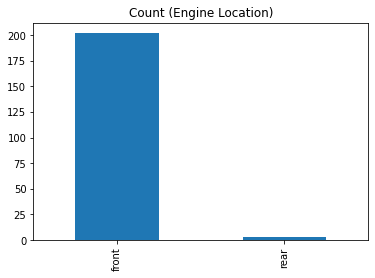

In [0]:
#Grafico de barras para la variable engine-location, se cuentan los valores y se grafican
target_count = df["engine-location"].value_counts()
target_count.plot(kind='bar', title='Count (Engine Location)')

En este paso se guarda en dos variables separadas la cantidad de cada clase. Las clases son <b>front</b> y <b>rear</b>:

In [0]:
# Class count
count_class_front, count_class_rear = df["engine-location"].value_counts()
print(count_class_front)
print(count_class_rear)

202
3


Se dividen los ejemplos en el dataframe en dos utilizando las clases como partición:

In [0]:
# Divide by class
df_class_front = df[df["engine-location"] == "front"]
df_class_rear = df[df["engine-location"] == "rear"]

Ahora se utilizar el método <code>df.sample</code> para obtener muestras aleatorias de cada clase. En este caso, hay tres ejemplos de la clase <b>rear</b> por lo que si se aplica undersampling, se seleccionan 3 ejemplos aleatorios de la clase <b>front</b>:

In [0]:
#Ramdom under-sampling. Selecciona de manera aleatoria la misma cantidad de ejemplos que hay de "rear".
df_class_front_under = df_class_front.sample(count_class_rear)
df_class_front_under.head()


,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,aspiration_turbo,volume
30,2,137,honda,gas,two,hatchback,fwd,front,86.6,0.052239,...,3.41,9.6,58,4800,49,54,6479.0,Bajo,0,-2.489842
88,-1,137,mitsubishi,gas,four,sedan,fwd,front,96.3,0.467164,...,3.46,7.5,116,5500,23,30,9279.0,Bajo,0,-5.720176
184,2,94,volkswagen,diesel,four,sedan,fwd,front,97.3,0.456716,...,3.40,23.0,52,4800,37,46,7995.0,Bajo,0,-4.847831


Finalmente se unen en un solo dataframe los dos conjuntos de ejemplos, en este caso sería un total de 6 ejemplos:

In [0]:
#Unirlos todos en un mismo dataframe
df_test_under = pd.concat([df_class_front_under, df_class_rear], axis=0)
df_test_under

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,aspiration_turbo,volume
30,2,137,honda,gas,two,hatchback,fwd,front,86.6,0.052239,...,3.41,9.6,58,4800,49,54,6479.0,Bajo,0,-2.489842
88,-1,137,mitsubishi,gas,four,sedan,fwd,front,96.3,0.467164,...,3.46,7.5,116,5500,23,30,9279.0,Bajo,0,-5.720176
184,2,94,volkswagen,diesel,four,sedan,fwd,front,97.3,0.456716,...,3.40,23.0,52,4800,37,46,7995.0,Bajo,0,-4.847831
126,3,122,porsche,gas,two,hardtop,rwd,rear,89.5,0.414925,...,2.90,9.5,207,5900,17,25,32528.0,Medio,0,-9.082502
127,3,122,porsche,gas,two,hardtop,rwd,rear,89.5,0.414925,...,2.90,9.5,207,5900,17,25,34028.0,Medio,0,-9.082502
128,3,122,porsche,gas,two,convertible,rwd,rear,89.5,0.414925,...,2.90,9.5,207,5900,17,25,37028.0,Medio,0,-9.082502


Si se grafica el dataframe resultante, se puede apreciar que ahora las clases están balanceadas:

Out[29]: <AxesSubplot:title={'center':'Count (Engine Location)'}>

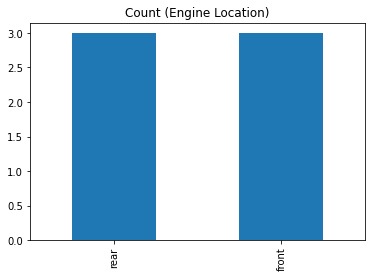

In [0]:
df_test_under["engine-location"].value_counts().plot(kind='bar', title='Count (Engine Location)')

##Anonimización

Existen diversas técnicas de anonimizar y ocultar los datos que se están manjeando en un conjunto de datos. A efectos de demostración se va a utilizar el atributo <b>make</b> que es la marca del carro para ocultar su contenido. Observe cómo se encuentran los datos inicialmente para la Marca.

In [0]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,aspiration_turbo,volume
0,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.413433,...,2.68,9.0,111,5000,21,27,13495.0,Bajo,0,-17.043925
1,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.413433,...,2.68,9.0,111,5000,21,27,16500.0,Bajo,0,-17.043925
2,1,122,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.449254,...,3.47,9.0,154,5000,19,26,16500.0,Medio,0,-4.486097
3,2,164,audi,gas,four,sedan,fwd,front,99.8,0.529851,...,3.40,10.0,102,5500,24,30,13950.0,Bajo,0,3.928435
4,2,164,audi,gas,four,sedan,4wd,front,99.4,0.529851,...,3.40,8.0,115,5500,18,22,17450.0,Bajo,0,6.617348
5,2,122,audi,gas,two,sedan,fwd,front,99.8,0.540299,...,3.40,8.5,110,5500,19,25,15250.0,Bajo,0,5.258038
6,1,158,audi,gas,four,sedan,fwd,front,105.8,0.770149,...,3.40,8.5,110,5500,19,25,17710.0,Bajo,0,110.095440
7,1,122,audi,gas,four,wagon,fwd,front,105.8,0.770149,...,3.40,8.5,110,5500,19,25,18920.0,Bajo,0,110.095440
8,1,158,audi,gas,four,sedan,fwd,front,105.8,0.770149,...,3.40,8.3,140,5500,17,20,23875.0,Medio,1,110.490756
9,0,122,audi,gas,two,hatchback,4wd,front,99.5,0.553731,...,3.40,7.0,160,5500,16,22,NaN,Medio,1,26.805728


In [0]:
df_makes_count = df['make'].value_counts()
df_makes_count

Out[31]: toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

A continuación, se va a codificar make con valores numéricos. Utilizando 0, 1, 2, 3... sucesivamente para cada categoría. La clase LabelEncoder() hace la mayor parte del trabajo por nosotros.

Es necesario instalar la librería sklearn-pandas para utilizar la clase LabelEncoder:

In [0]:
%sh
pip install sklearn-pandas

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


Se importan las librerías necesarias. <code>DataFrameMapper</code> viene de <code>sklearn_pandas</code> y recibe una lista de elementos a codificar y los nombres de las columnas a transformar.

In [0]:
# Se importan las librerías necesarias
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder
# Se configura la columna a codificar
encoders = [(["make"], LabelEncoder())]
# Se realiza el mapeo de las tuplas para la columna seleccionada
mapper = DataFrameMapper(encoders, df_out=True)
# Se une la columna anonimizada con el resto del dataframe
new_cols = mapper.fit_transform(df.copy())
df = pd.concat([df.drop(columns=["make"]), new_cols], axis="columns")

/databricks/python/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Compruebe cómo ahora la columna make no muestra los nombres de las marcas sino números.

In [0]:
df_makes_count = df['make'].value_counts()
df_makes_count

Out[34]: 19    32
12    18
8     17
11    13
5     13
20    12
18    12
13    11
21    11
4      9
9      8
2      8
1      7
14     7
17     6
15     5
6      4
7      3
3      3
0      3
16     2
10     1
Name: make, dtype: int64

##Links de ayuda interesantes
<ul>
  <li>Resampling strategies for imbalanced dataset: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets</li>
  <li>A simple way to anonymize data with Python and Pandas: https://dev.to/r0f1/a-simple-way-to-anonymize-data-with-python-and-pandas-79g</li>
<ul>